In [92]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt 

sb.set() 

---

### Importing 1st Dataset : BRFSS (Behavioral Risk Factor Surveillance System) 2015

  

In [93]:
brfss2015_full = pd.read_csv('full_BRFSS_2015.csv', header = [0])
brfss2015_full.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,b'01292015',b'01',b'29',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0
1,1.0,1.0,b'01202015',b'01',b'20',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,2.0,2.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,2.0
2,1.0,1.0,b'02012015',b'02',b'01',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN
3,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,9.0
4,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0


In [94]:
print("Data type : ", type(brfss2015_full))
print("Data dims : ", brfss2015_full.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (441456, 330)


### Cleaning Full BRFSS 2015 Data

We want to find columns that are more targetted towards heart disease


In [95]:
print(brfss2015_full.columns.values)

['_STATE' 'FMONTH' 'IDATE' 'IMONTH' 'IDAY' 'IYEAR' 'DISPCODE' 'SEQNO'
 '_PSU' 'CTELENUM' 'PVTRESD1' 'COLGHOUS' 'STATERES' 'CELLFON3' 'LADULT'
 'NUMADULT' 'NUMMEN' 'NUMWOMEN' 'CTELNUM1' 'CELLFON2' 'CADULT' 'PVTRESD2'
 'CCLGHOUS' 'CSTATE' 'LANDLINE' 'HHADULT' 'GENHLTH' 'PHYSHLTH' 'MENTHLTH'
 'POORHLTH' 'HLTHPLN1' 'PERSDOC2' 'MEDCOST' 'CHECKUP1' 'BPHIGH4' 'BPMEDS'
 'BLOODCHO' 'CHOLCHK' 'TOLDHI2' 'CVDINFR4' 'CVDCRHD4' 'CVDSTRK3' 'ASTHMA3'
 'ASTHNOW' 'CHCSCNCR' 'CHCOCNCR' 'CHCCOPD1' 'HAVARTH3' 'ADDEPEV2'
 'CHCKIDNY' 'DIABETE3' 'DIABAGE2' 'SEX' 'MARITAL' 'EDUCA' 'RENTHOM1'
 'NUMHHOL2' 'NUMPHON2' 'CPDEMO1' 'VETERAN3' 'EMPLOY1' 'CHILDREN' 'INCOME2'
 'INTERNET' 'WEIGHT2' 'HEIGHT3' 'PREGNANT' 'QLACTLM2' 'USEEQUIP' 'BLIND'
 'DECIDE' 'DIFFWALK' 'DIFFDRES' 'DIFFALON' 'SMOKE100' 'SMOKDAY2'
 'STOPSMK2' 'LASTSMK2' 'USENOW3' 'ALCDAY5' 'AVEDRNK2' 'DRNK3GE5'
 'MAXDRNKS' 'FRUITJU1' 'FRUIT1' 'FVBEANS' 'FVGREEN' 'FVORANG' 'VEGETAB1'
 'EXERANY2' 'EXRACT11' 'EXEROFT1' 'EXERHMM1' 'EXRACT21' 'EXEROFT2'
 'EXERHM

### BRFSS 2015 Selected Columns:

Research in the field has identified the following as important risk factors for heart disease :

Buttar, H. S., Li, T., & Ravi, N. (2005). Prevention of cardiovascular diseases: Role of exercise, dietary interventions, obesity and smoking cessation. Experimental and clinical cardiology, 10(4), 229–249.

- Blood pressure (high)
- cholesterol (high)
- smoking
- diabetes
- obesity
- age
- sex
- race
- diet
- exercise
- alcohol consumption
- BMI
- Household Income
- Marital Status
- Sleep
- Time since last checkup
- Education
- Health care coverage
- Mental Health

Given these risk variables, we choose columns/questions in the BRFSS that were associated to them. By reviewing the BRFSS 2015 Codebook, we can see the questions in details to fully understand what the columns represents. Then, we match the variables in codebook with the variable names in the dataset.

References are also taken from the research paper by Zidian Xie et al for Building Risk Prediction Models for Type 2 Diabetes Using Machine Learning Techniques from 2014 BRFSS. Diabetes and heart disease outcomes are strongly correlated, with cardiovascular disease complications being the leading cause of death for diabetics. 

- BRFSS 2015 Codebook: https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf
- Research paper by Zidian Xie et al: https://www.cdc.gov/pcd/issues/2019/19_0109.htm


In [96]:
# Selecting the target columns
brfss2015_selected = brfss2015_full[['_MICHD', 
                                         '_RFHYPE5',  
                                         'TOLDHI2', '_CHOLCHK', 
                                         '_BMI5', 
                                         'SMOKE100', 
                                         'CVDSTRK3', 'DIABETE3', 
                                         '_TOTINDA', 
                                         '_FRTLT1', '_VEGLT1', 
                                         '_RFDRHV5', 
                                         'HLTHPLN1', 'MEDCOST', 
                                         'GENHLTH', 'MENTHLTH', 'PHYSHLTH', 'DIFFWALK', 
                                         'SEX', '_AGEG5YR', 'EDUCA', 'INCOME2' ]]
brfss2015_selected.shape


(441456, 22)

In [97]:
brfss2015_selected.head()


,_MICHD,_RFHYPE5,TOLDHI2,_CHOLCHK,_BMI5,SMOKE100,CVDSTRK3,DIABETE3,_TOTINDA,_FRTLT1,...,HLTHPLN1,MEDCOST,GENHLTH,MENTHLTH,PHYSHLTH,DIFFWALK,SEX,_AGEG5YR,EDUCA,INCOME2
0,2.0,2.0,1.0,1.0,4018.0,1.0,2.0,3.0,2.0,2.0,...,1.0,2.0,5.0,18.0,15.0,1.0,2.0,9.0,4.0,3.0
1,2.0,1.0,2.0,2.0,2509.0,1.0,2.0,3.0,1.0,2.0,...,2.0,1.0,3.0,88.0,88.0,2.0,2.0,7.0,6.0,1.0
2,NaN,1.0,1.0,1.0,2204.0,NaN,1.0,3.0,9.0,9.0,...,1.0,2.0,4.0,88.0,15.0,NaN,2.0,11.0,4.0,99.0
3,2.0,2.0,1.0,1.0,2819.0,2.0,2.0,3.0,2.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,2.0,9.0,4.0,8.0
4,2.0,1.0,2.0,1.0,2437.0,2.0,2.0,3.0,2.0,9.0,...,1.0,2.0,5.0,88.0,20.0,2.0,2.0,9.0,5.0,77.0


In [98]:
# Dropping missing values

brfss2015_selected = brfss2015_selected.dropna()
brfss2015_selected.shape

(343606, 22)

### Modify and clean the values to be more suitable to ML algorithms

Response Variable/Dependent Variable: _MICHD
- Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
- Change 2 to 0 because this means did not have MI or CHD

In [99]:
brfss2015_selected['_MICHD'] = brfss2015_selected['_MICHD'].replace({2: 0})
brfss2015_selected._MICHD.unique()

array([0., 1.])

Independent Variables:

1. _RFHYPE5

- Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional
- Change 1 to 0 so it represetnts No high blood pressure
- Change 2 to 1 so it represents high blood pressure

In [100]:
brfss2015_selected['_RFHYPE5'] = brfss2015_selected['_RFHYPE5'].replace({1:0, 2:1})
brfss2015_selected = brfss2015_selected[brfss2015_selected._RFHYPE5 != 9]
brfss2015_selected._RFHYPE5.unique()

array([1., 0.])

2. TOLDHI2
- Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high?
- Change 2 to 0 because it is No
- Remove all 7 (don't know)
- Remove all 9 (refused)

In [101]:
brfss2015_selected['TOLDHI2'] = brfss2015_selected['TOLDHI2'].replace({2:0})
brfss2015_selected = brfss2015_selected[brfss2015_selected.TOLDHI2 != 7]
brfss2015_selected = brfss2015_selected[brfss2015_selected.TOLDHI2 != 9]
brfss2015_selected.TOLDHI2.unique()

array([1., 0.])

3. _CHOLCHK
- About how long has it been since you last had your blood cholesterol checked?
- Change 3 to 0 and 2 to 0 for Not checked cholesterol in past 5 years
- Remove 9

In [102]:
brfss2015_selected['_CHOLCHK'] = brfss2015_selected['_CHOLCHK'].replace({3:0,2:0})
brfss2015_selected = brfss2015_selected[brfss2015_selected._CHOLCHK != 9]
brfss2015_selected._CHOLCHK.unique()

array([1., 0.])

4. _BMI5 
- Body Mass Index (BMI)
- No changes
- The original data it is BMI * 100. So for example a BMI of 4018 is really 40.18

In [103]:
brfss2015_selected['_BMI5'] = brfss2015_selected['_BMI5'].div(100).round(0)
brfss2015_selected._BMI5.unique()

array([40., 25., 28., 24., 27., 30., 26., 23., 34., 33., 21., 22., 31.,
       38., 20., 19., 32., 46., 41., 37., 36., 29., 35., 18., 54., 45.,
       39., 47., 43., 55., 49., 42., 17., 16., 48., 44., 50., 59., 15.,
       52., 53., 57., 51., 14., 58., 63., 61., 56., 60., 74., 62., 64.,
       13., 66., 73., 65., 68., 85., 71., 84., 67., 70., 82., 79., 92.,
       72., 88., 96., 81., 12., 77., 95., 75., 91., 69., 76., 87., 89.,
       83., 98., 86., 80., 90., 78., 97.])

5. SMOKE100
- Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]
- Change 2 to 0 because it is No
- Remove all 7 (don't know)
- Remove all 9 (refused)

In [104]:
brfss2015_selected['SMOKE100'] = brfss2015_selected['SMOKE100'].replace({2:0})
brfss2015_selected = brfss2015_selected[brfss2015_selected.SMOKE100 != 7]
brfss2015_selected = brfss2015_selected[brfss2015_selected.SMOKE100 != 9]
brfss2015_selected.SMOKE100.unique()

array([1., 0.])

6. CVDSTRK3
- (Ever told) you had a stroke.
- Change 2 to 0 because it is No
- Remove all 7 (dont knows)
- Remove all 9 (refused)

In [105]:
brfss2015_selected['CVDSTRK3'] = brfss2015_selected['CVDSTRK3'].replace({2:0})
brfss2015_selected = brfss2015_selected[brfss2015_selected.CVDSTRK3 != 7]
brfss2015_selected = brfss2015_selected[brfss2015_selected.CVDSTRK3 != 9]
brfss2015_selected.CVDSTRK3.unique()

array([0., 1.])

7. DIABETE3
- (Ever told) you have diabetes (If "Yes" and respondent is female, ask "Was this only when you were pregnant?". If
Respondent says pre-diabetes or borderline diabetes, use response code 4.)
- 0 is for no diabetes or only during pregnancy
- 1 is for pre-diabetes or borderline diabetes
- 2 is for yes diabetes
- Remove all 7 (dont knows)
- Remove all 9 (refused)

In [106]:
brfss2015_selected['DIABETE3'] = brfss2015_selected['DIABETE3'].replace({2:0, 3:0, 1:2, 4:1})
brfss2015_selected = brfss2015_selected[brfss2015_selected.DIABETE3 != 7]
brfss2015_selected = brfss2015_selected[brfss2015_selected.DIABETE3 != 9]
brfss2015_selected.DIABETE3.unique()

array([0., 2., 1.])

8. _TOTINDA
- Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
- 1 for physical activity
- change 2 to 0 for no physical activity
- Remove all 9 (don't know/refused)

In [107]:
brfss2015_selected['_TOTINDA'] = brfss2015_selected['_TOTINDA'].replace({2:0})
brfss2015_selected = brfss2015_selected[brfss2015_selected._TOTINDA != 9]
brfss2015_selected._TOTINDA.unique()

array([0., 1.])

9. _FRTLT1
- Consume Fruit 1 or more times per day
- Change 2 to 0. This means no fruit consumed per day
- 1 means consumed 1 or more pieces of fruit per day 
- Remove all dont knows and missing 9

In [108]:
brfss2015_selected['_FRTLT1'] = brfss2015_selected['_FRTLT1'].replace({2:0})
brfss2015_selected = brfss2015_selected[brfss2015_selected._FRTLT1 != 9]
brfss2015_selected._FRTLT1.unique()

array([0., 1.])

10. _VEGLT1
- Consume Vegetables 1 or more times per day
- Change 2 to 0. This means no vegetables consumed per day
- 1 means consumed 1 or more pieces of vegetable per day 
- Remove all dont knows and missing 9

In [109]:
brfss2015_selected['_VEGLT1'] = brfss2015_selected['_VEGLT1'].replace({2:0})
brfss2015_selected = brfss2015_selected[brfss2015_selected._VEGLT1 != 9]
brfss2015_selected._VEGLT1.unique()

array([1., 0.])

11. _RFDRHV5
- Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per
week)
- Change 1 to 0 (1 was no for heavy drinking)
- Change all 2 to 1 (2 was yes for heavy drinking)
- Remove all dont knows and missing 9

In [110]:
brfss2015_selected['_RFDRHV5'] = brfss2015_selected['_RFDRHV5'].replace({1:0, 2:1})
brfss2015_selected = brfss2015_selected[brfss2015_selected._RFDRHV5 != 9]
brfss2015_selected._RFDRHV5.unique()

array([0., 1.])

12. HLTHPLN1
- Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or
government plans such as Medicare, or Indian Health Service?
- 1 is yes
- Change 2 to 0 for no health care access
- Remove 7 and 9 for don't know or refused

In [111]:
brfss2015_selected['HLTHPLN1'] = brfss2015_selected['HLTHPLN1'].replace({2:0})
brfss2015_selected = brfss2015_selected[brfss2015_selected.HLTHPLN1 != 7]
brfss2015_selected = brfss2015_selected[brfss2015_selected.HLTHPLN1 != 9]
brfss2015_selected.HLTHPLN1.unique()

array([1., 0.])

13. MEDCOST
- Was there a time in the past 12 months when you needed to see a doctor but could not because of cost?
- Change 2 to 0 for no
- 1 is already yes
- Remove 7 for don't know and 9 for refused

In [112]:
brfss2015_selected['MEDCOST'] = brfss2015_selected['MEDCOST'].replace({2:0})
brfss2015_selected = brfss2015_selected[brfss2015_selected.MEDCOST != 7]
brfss2015_selected = brfss2015_selected[brfss2015_selected.MEDCOST != 9]
brfss2015_selected.MEDCOST.unique()

array([0., 1.])

14. GENHLTH
- Would you say that in general your health is: scale 1-9
- This is an ordinal variable that I want to keep (1 is Excellent -> 5 is Poor)
- Remove 7 and 9 for don't know and refused

In [113]:
brfss2015_selected = brfss2015_selected[brfss2015_selected.GENHLTH != 7]
brfss2015_selected = brfss2015_selected[brfss2015_selected.GENHLTH != 9]
brfss2015_selected.GENHLTH.unique()

array([5., 3., 2., 4., 1.])

15. MENTHLTH
- Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many
days during the past 30 days was your mental health not good?
- Scale will be 0-30. This is number of days
- Change 88 to 0 because it means none (no bad mental health days)
- Remove 77 and 99 for don't know not sure and refused

In [114]:
brfss2015_selected['MENTHLTH'] = brfss2015_selected['MENTHLTH'].replace({88:0})
brfss2015_selected = brfss2015_selected[brfss2015_selected.MENTHLTH != 77]
brfss2015_selected = brfss2015_selected[brfss2015_selected.MENTHLTH != 99]
brfss2015_selected.MENTHLTH.unique()

array([18.,  0., 30.,  3.,  5., 15., 10.,  6., 20.,  2., 25.,  1., 29.,
        4.,  7.,  8., 21., 14., 26.,  9., 16., 28., 11., 12., 24., 17.,
       13., 23., 27., 19., 22.])

16. PHYSHLTH
- Now thinking about your physical health, which includes physical illness and injury, for how many days during the past
30 days was your physical health not good?
- Scale will be 0-30. This is number of days
- Change 88 to 0 because it means none (no bad mental health days)
- Remove 77 and 99 for don't know not sure and refused

In [115]:
brfss2015_selected['PHYSHLTH'] = brfss2015_selected['PHYSHLTH'].replace({88:0})
brfss2015_selected = brfss2015_selected[brfss2015_selected.PHYSHLTH != 77]
brfss2015_selected = brfss2015_selected[brfss2015_selected.PHYSHLTH != 99]
brfss2015_selected.PHYSHLTH.unique()

array([15.,  0., 30.,  2., 14., 28.,  7., 20.,  3., 10.,  1.,  5., 17.,
        4., 19.,  6., 21., 12.,  8., 25., 27., 22., 29., 24.,  9., 16.,
       18., 23., 13., 26., 11.])

17. DIFFWALK
- Do you have serious difficulty walking or climbing stairs?
- Change 2 to 0 for no
- 1 is already yes
- Remove 7 and 9 for don't know not sure and refused

In [116]:
brfss2015_selected['DIFFWALK'] = brfss2015_selected['DIFFWALK'].replace({2:0})
brfss2015_selected = brfss2015_selected[brfss2015_selected.DIFFWALK != 7]
brfss2015_selected = brfss2015_selected[brfss2015_selected.DIFFWALK != 9]
brfss2015_selected.DIFFWALK.unique()

array([1., 0.])

18. SEX
- Indicate sex of respondent.
- Change 2 to 0 (female as 0)
- Male is 1

In [117]:
brfss2015_selected['SEX'] = brfss2015_selected['SEX'].replace({2:0})
brfss2015_selected.SEX.unique()

array([0., 1.])

19. _AGEG5YR
- Fourteen-level age category
- Already ordinal
- 1 is 18-24 all the way up to 13. 5 year increments.
- Remove 14 because it is don't know or missing

In [118]:
brfss2015_selected = brfss2015_selected[brfss2015_selected._AGEG5YR != 14]
brfss2015_selected._AGEG5YR.unique()

array([ 9.,  7., 11., 10., 13.,  8.,  4.,  6.,  2., 12.,  5.,  1.,  3.])

20. EDUCA
- What is the highest grade or year of school you completed?
- This is already an ordinal variable with 1 being never attended school or kindergarten only up to 6 being college 4 years or more
- Scale here is 1-6
- Remove 9 for refused

In [119]:
brfss2015_selected = brfss2015_selected[brfss2015_selected.EDUCA != 9]
brfss2015_selected.EDUCA.unique()

array([4., 6., 3., 5., 2., 1.])

21. INCOME2
- Is your annual household income from all sources (If respondent refuses at any income level, code "Refused.")
- Variable is already ordinal with 1 being less than $10,000 all the way up to 8 being $75,000 or more
- Remove 77 and 99 for don't know and refused

In [120]:
brfss2015_selected = brfss2015_selected[brfss2015_selected.INCOME2 != 77]
brfss2015_selected = brfss2015_selected[brfss2015_selected.INCOME2 != 99]
brfss2015_selected.INCOME2.unique()

array([3., 1., 8., 6., 4., 7., 2., 5.])

In [121]:
# We have 253,680 cleaned rows and 22 columns (1 of which is our dependent variable)
brfss2015_selected.shape


(253680, 22)

In [122]:
brfss2015_selected.head()

,_MICHD,_RFHYPE5,TOLDHI2,_CHOLCHK,_BMI5,SMOKE100,CVDSTRK3,DIABETE3,_TOTINDA,_FRTLT1,...,HLTHPLN1,MEDCOST,GENHLTH,MENTHLTH,PHYSHLTH,DIFFWALK,SEX,_AGEG5YR,EDUCA,INCOME2
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
3,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
5,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
6,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


### Renaming the columns to make it more readable

In [123]:
brfss2015_cleaned = brfss2015_selected.rename(columns = {'_MICHD':'HeartDiseaseorAttack', 
                                         '_RFHYPE5':'HighBP',  
                                         'TOLDHI2':'HighChol', '_CHOLCHK':'CholCheck', 
                                         '_BMI5':'BMI', 
                                         'SMOKE100':'Smoker', 
                                         'CVDSTRK3':'Stroke', 'DIABETE3':'Diabetes', 
                                         '_TOTINDA':'PhysActivity', 
                                         '_FRTLT1':'Fruits', '_VEGLT1':"Veggies", 
                                         '_RFDRHV5':'HvyAlcoholConsump', 
                                         'HLTHPLN1':'AnyHealthcare', 'MEDCOST':'NoDocbcCost', 
                                         'GENHLTH':'GenHlth', 'MENTHLTH':'MentHlth', 'PHYSHLTH':'PhysHlth', 'DIFFWALK':'DiffWalk', 
                                         'SEX':'Sex', '_AGEG5YR':'Age', 'EDUCA':'Education', 'INCOME2':'Income' })

In [124]:
brfss2015_cleaned.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
3,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
5,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
6,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


### Exploratory Data Analysis and Visualisation

Data Description



In [125]:
print(f'data columns type : \n{brfss2015_cleaned.dtypes}')

data columns type : 
HeartDiseaseorAttack    float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
Diabetes                float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


In [126]:
print(f'Number of unique values in each column : \n{brfss2015_cleaned.nunique()}')

Number of unique values in each column : 
HeartDiseaseorAttack     2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
Diabetes                 3
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64


In [127]:
brfss2015_cleaned.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


### Correlation Matrix

- Finding features with more than 0.5 correlation with target

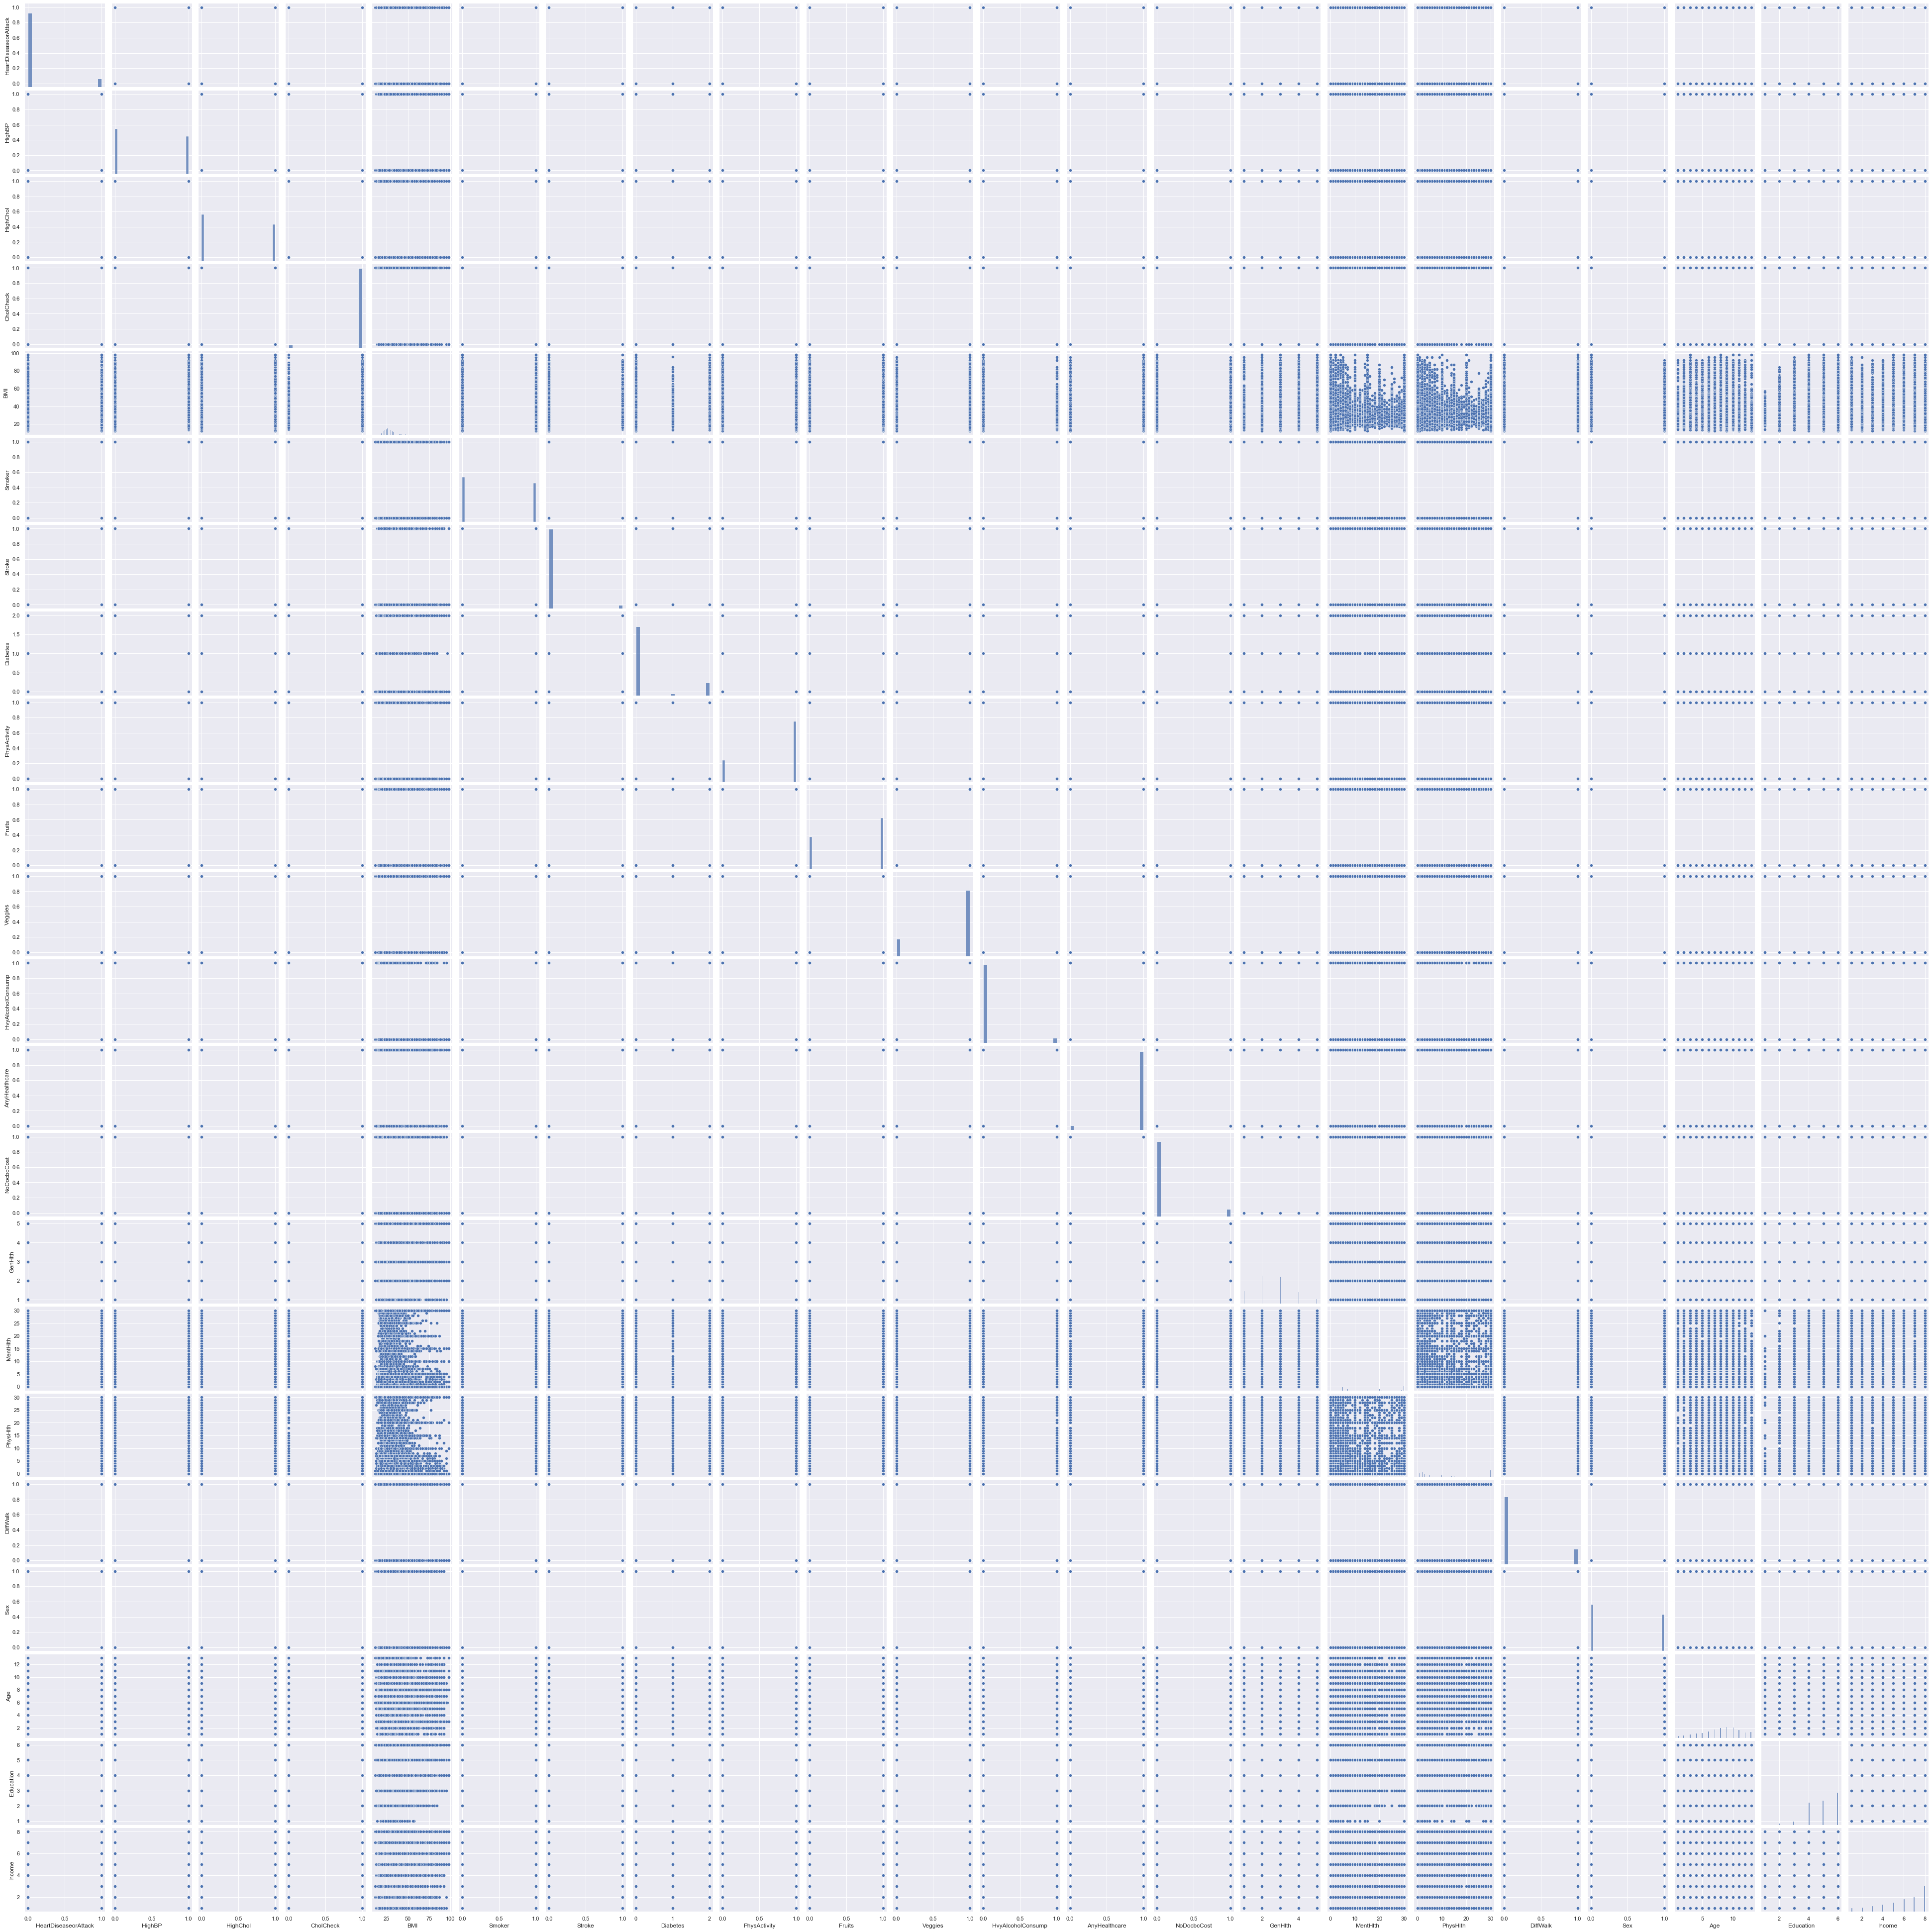

In [163]:
# Draw pairs of variables against one another
sb.pairplot(data = brfss2015_cleaned)

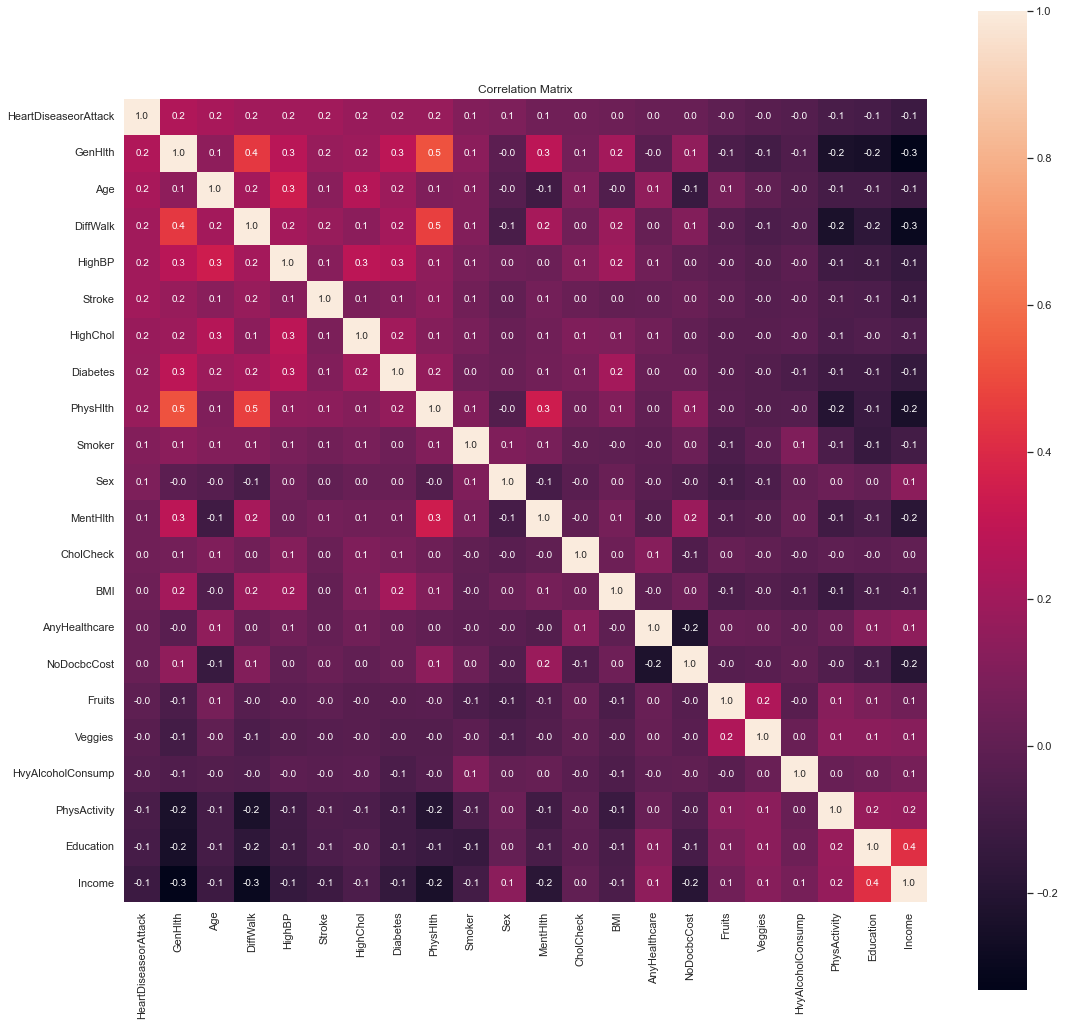

In [164]:
bfrss2015_corr_matrix = brfss2015_cleaned.corr()
k = 22 
cols = bfrss2015_corr_matrix.nlargest(k,'HeartDiseaseorAttack')['HeartDiseaseorAttack'].index
cm = np.corrcoef(brfss2015_cleaned[cols].values.T)
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(18,18))  # Sample figsize in inches
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.01f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,ax=ax)
plt.title("Correlation Matrix")
plt.show()

Dropping Duplicated Rows


In [165]:
duplicate_rows = brfss2015_cleaned[brfss2015_cleaned.duplicated()]
print(f'We have {duplicate_rows.shape[0]} duplicated rows in our data.')

We have 0 duplicated rows in our data.


In [166]:
brfss2015_cleaned.loc[brfss2015_cleaned.duplicated(), :]

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income


In [167]:
brfss2015_cleaned.drop_duplicates(inplace=True)
print(f'Data shape after drop duplicated rows : {brfss2015_cleaned.shape}')

Data shape after drop duplicated rows : (229781, 22)


### Visualisation

In [168]:
brfss2015_cleaned.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,229781.000000,229781.000000,229781.000000,229781.000000,229781.00000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,...,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000
mean,0.103216,0.454441,0.441760,0.959535,28.68567,0.465661,0.044756,0.325627,0.733355,0.612966,...,0.946075,0.092810,2.601151,3.505373,4.675178,0.185507,0.439231,8.086582,4.980568,5.890383
std,0.304241,0.497921,0.496598,0.197047,6.78636,0.498821,0.206767,0.724623,0.442206,0.487073,...,0.225871,0.290167,1.064685,7.713725,9.046568,0.388709,0.496295,3.093809,0.992895,2.092477
min,0.000000,0.000000,0.000000,0.000000,12.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.00000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,6.000000
75%,0.000000,1.000000,1.000000,1.000000,32.00000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.00000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [169]:
# Draw the distributions of all variables
f, axes = plt.subplots(22, 3, figsize=(200,100))

count = 0
for var in brfss2015_cleaned:
    sb.boxplot(data = brfss2015_cleaned[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = brfss2015_cleaned[var], ax = axes[count,1])
    sb.violinplot(data = brfss2015_cleaned[var], orient = "h", ax = axes[count,2])
    count += 1

### Linear Regression: Splitting X and Y


In [170]:
X = brfss2015_cleaned.drop(columns='HeartDiseaseorAttack')
Y = pd.DataFrame(brfss2015_cleaned['HeartDiseaseorAttack'])

print(f'X shape : {X.shape}')
print(f'Y shape : {Y.shape}')

X shape : (229781, 21)
Y shape : (229781, 1)


In [171]:
Y.value_counts()

HeartDiseaseorAttack
0.0                     206064
1.0                      23717
dtype: int64